<a href="https://colab.research.google.com/github/unjuken/scalene_svm/blob/main/scalene_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer

import matplotlib.pyplot as plt 

import seaborn as sns

In [2]:
df = pd.read_csv(r'/content/IMB553-XLS-ENG.csv', delimiter=';', decimal=',')  
df

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,3828260,No,NaN,0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12329,3830270,No,NaN,0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12330,3834159,No,0.0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
12331,3835433,No,0.0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                12333 non-null  int64  
 1   DOJ Extended                 12333 non-null  object 
 2   Duration to accept offer     9614 non-null   float64
 3   Notice period                12333 non-null  int64  
 4   Offered band                 12333 non-null  object 
 5   Pecent hike expected in CTC  11586 non-null  float64
 6   Percent hike offered in CTC  11737 non-null  float64
 7   Percent difference CTC       11482 non-null  float64
 8   Joining Bonus                12333 non-null  object 
 9   Candidate relocate actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate Source             12333 non-null  object 
 12  Rex in Yrs                   12333 non-null  int64  
 13  LOB             

In [4]:
df['DOJ Extended'] = df['DOJ Extended'].astype('category')
df['Offered band'] = df['Offered band'].astype('category')
df['Joining Bonus'] = df['Joining Bonus'].astype('category')
df['Candidate relocate actual'] = df['Candidate relocate actual'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Candidate Source'] = df['Candidate Source'].astype('category')
df['LOB'] = df['LOB'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Status'] = df['Status'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Candidate Ref                12333 non-null  int64   
 1   DOJ Extended                 12333 non-null  category
 2   Duration to accept offer     9614 non-null   float64 
 3   Notice period                12333 non-null  int64   
 4   Offered band                 12333 non-null  category
 5   Pecent hike expected in CTC  11586 non-null  float64 
 6   Percent hike offered in CTC  11737 non-null  float64 
 7   Percent difference CTC       11482 non-null  float64 
 8   Joining Bonus                12333 non-null  category
 9   Candidate relocate actual    12333 non-null  category
 10  Gender                       12333 non-null  category
 11  Candidate Source             12333 non-null  category
 12  Rex in Yrs                   12333 non-null  int64   
 13  L

In [6]:
#chack missing values in terms of percentage.
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Candidate Ref,Candidate Ref,0.000000
DOJ Extended,DOJ Extended,0.000000
Duration to accept offer,Duration to accept offer,22.046542
Notice period,Notice period,0.000000
Offered band,Offered band,0.000000
Pecent hike expected in CTC,Pecent hike expected in CTC,6.056920
Percent hike offered in CTC,Percent hike offered in CTC,4.832563
Percent difference CTC,Percent difference CTC,6.900186
Joining Bonus,Joining Bonus,0.000000
Candidate relocate actual,Candidate relocate actual,0.000000


In [7]:
# creación de variables sustitutas
for col in df:
    if df[col].isna().sum() != 0: 
        df[col + '_surrogate'] = df[col].isna().astype(int)

# fijación de variables categóricas
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(df.select_dtypes(exclude=['int64','float64']))
df[df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df.select_dtypes(exclude=['int64','float64']))
           
# fijación de variables numéricas 
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate Ref                          12333 non-null  float64
 1   DOJ Extended                           12333 non-null  object 
 2   Duration to accept offer               12333 non-null  float64
 3   Notice period                          12333 non-null  float64
 4   Offered band                           12333 non-null  object 
 5   Pecent hike expected in CTC            12333 non-null  float64
 6   Percent hike offered in CTC            12333 non-null  float64
 7   Percent difference CTC                 12333 non-null  float64
 8   Joining Bonus                          12333 non-null  object 
 9   Candidate relocate actual              12333 non-null  object 
 10  Gender                                 12333 non-null  object 
 11  Ca

In [9]:
df

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,Duration to accept offer_surrogate,Pecent hike expected in CTC_surrogate,Percent hike offered in CTC_surrogate,Percent difference CTC_surrogate
0,2110407.0,Yes,14.0,30.0,E2,-20.79,13.16,42.86,No,No,Female,Agency,7.0,ERS,Noida,34.0,Joined,0.0,0.0,0.0,0.0
1,2112635.0,No,18.0,30.0,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8.0,INFRA,Chennai,34.0,Joined,0.0,0.0,0.0,0.0
2,2112838.0,No,3.0,45.0,E2,42.84,42.84,0.00,No,No,Male,Agency,4.0,INFRA,Noida,27.0,Joined,0.0,0.0,0.0,0.0
3,2115021.0,No,26.0,30.0,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4.0,INFRA,Noida,34.0,Joined,0.0,0.0,0.0,0.0
4,2115125.0,Yes,1.0,120.0,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6.0,INFRA,Noida,34.0,Joined,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,3828260.0,No,9.0,0.0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0.0,BSERV,Chennai,34.0,Joined,1.0,0.0,0.0,0.0
12329,3830270.0,No,9.0,0.0,E0,47.54,42.86,-3.18,No,No,Male,Direct,0.0,BSERV,Chennai,34.0,Joined,1.0,0.0,0.0,0.0
12330,3834159.0,No,0.0,0.0,E2,35.42,35.42,0.00,No,No,Male,Direct,5.0,INFRA,Noida,34.0,Joined,0.0,0.0,0.0,0.0
12331,3835433.0,No,0.0,30.0,E1,76.92,53.85,-13.04,No,No,Male,Direct,4.0,INFRA,Noida,34.0,Joined,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate Ref                          12333 non-null  float64
 1   DOJ Extended                           12333 non-null  object 
 2   Duration to accept offer               12333 non-null  float64
 3   Notice period                          12333 non-null  float64
 4   Offered band                           12333 non-null  object 
 5   Pecent hike expected in CTC            12333 non-null  float64
 6   Percent hike offered in CTC            12333 non-null  float64
 7   Percent difference CTC                 12333 non-null  float64
 8   Joining Bonus                          12333 non-null  object 
 9   Candidate relocate actual              12333 non-null  object 
 10  Gender                                 12333 non-null  object 
 11  Ca

In [11]:
pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns.drop('Status'), drop_first = True)

df.head()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status,Duration to accept offer_surrogate,Pecent hike expected in CTC_surrogate,Percent hike offered in CTC_surrogate,Percent difference CTC_surrogate,DOJ Extended_Yes,Offered band_E1,Offered band_E2,Offered band_E3,Offered band_E4,Offered band_E5,Offered band_E6,Joining Bonus_Yes,Candidate relocate actual_Yes,Gender_Male,Candidate Source_Direct,Candidate Source_Employee Referral,LOB_BFSI,LOB_BSERV,LOB_CORP,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,LOB_SALES,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Coimbatore,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,2110407.0,14.0,30.0,-20.79,13.16,42.86,7.0,34.0,Joined,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2112635.0,18.0,30.0,50.00,320.00,180.00,8.0,34.0,Joined,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2112838.0,3.0,45.0,42.84,42.84,0.00,4.0,27.0,Joined,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2115021.0,26.0,30.0,42.84,42.84,0.00,4.0,34.0,Joined,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2115125.0,1.0,120.0,42.59,42.59,0.00,6.0,34.0,Joined,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate Ref                          12333 non-null  float64
 1   Duration to accept offer               12333 non-null  float64
 2   Notice period                          12333 non-null  float64
 3   Pecent hike expected in CTC            12333 non-null  float64
 4   Percent hike offered in CTC            12333 non-null  float64
 5   Percent difference CTC                 12333 non-null  float64
 6   Rex in Yrs                             12333 non-null  float64
 7   Age                                    12333 non-null  float64
 8   Status                                 12333 non-null  object 
 9   Duration to accept offer_surrogate     12333 non-null  float64
 10  Pecent hike expected in CTC_surrogate  12333 non-null  float64
 11  Pe

In [13]:
#drop the candidate id
df = df.drop(columns = 'Candidate Ref')
df['Status'] = df['Status'].astype('category')
#Cambiar orden de la categorizacion para que 1 sea "Joined"
df["Status"] = df["Status"].cat.reorder_categories(["Not Joined", "Joined"])
df["Status"] = df["Status"].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Duration to accept offer               12333 non-null  float64
 1   Notice period                          12333 non-null  float64
 2   Pecent hike expected in CTC            12333 non-null  float64
 3   Percent hike offered in CTC            12333 non-null  float64
 4   Percent difference CTC                 12333 non-null  float64
 5   Rex in Yrs                             12333 non-null  float64
 6   Age                                    12333 non-null  float64
 7   Status                                 12333 non-null  int8   
 8   Duration to accept offer_surrogate     12333 non-null  float64
 9   Pecent hike expected in CTC_surrogate  12333 non-null  float64
 10  Percent hike offered in CTC_surrogate  12333 non-null  float64
 11  Pe

In [14]:
X = df.drop(columns = 'Status')
y = df['Status']

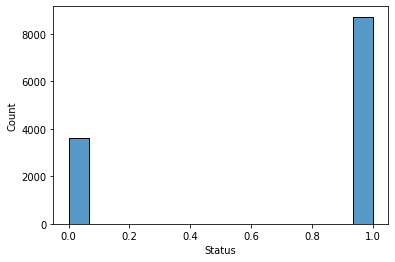

In [15]:
sns.histplot(df['Status'])

In [16]:
# Curva ROC
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Matriz de Confusión: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [17]:
# Definimos la semilla para el generador de número aleatorios
np.random.seed(333)

# Dividimos los datos aleatoriamente en 80% para entrenamiento y 20% para prueba 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, stratify=y)
# IMPORTANTE: Las muestras están estratificadas, i.e., la proporción de clientes retenidos y no-retenidos es la misma en ambos

# Chequeemos los resultados
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8633, 45)
(3700, 45)
(8633,)
(3700,)


In [18]:
# Distribución de frecuencia de las clases

train_outcome = pd.crosstab(index=y_train,  # Make a crosstab
                              columns="count")      # Name the count column

notjoined_count = train_outcome['count'][0]
joined_count = train_outcome['count'][1]

train_outcome

col_0,count
Status,
0,2526
1,6107


#GridSearch Linear Kernel

## Kernel: Linear, C:1


In [19]:
columns = ['Threshold', 'Kernel', 'C', 'Gamma', "Accuracy", "Sensitivity", "Specificity", "Precision", "NPV", "AUC"]
resultshistory = pd.DataFrame(columns = columns)

0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 1
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


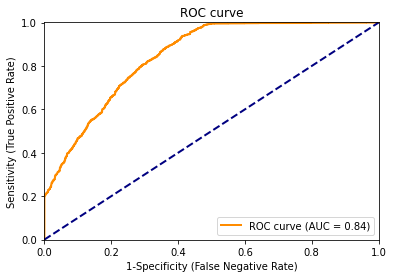

 AUC: 0.8448798944884625
   Threshold  Kernel  C Gamma  Accuracy  Sensitivity  Specificity  Precision  \
0   0.707402  linear  1    NA  0.851351     0.989687     0.516636   0.832049   

        NPV      AUC  
0  0.953925  0.84488  


In [20]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 1

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 2
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


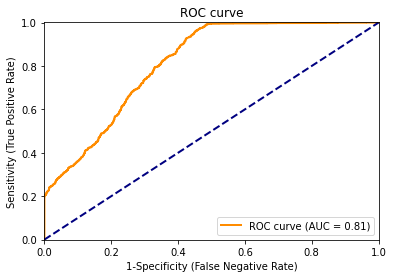

 AUC: 0.8127985692680701
   Threshold  Kernel  C Gamma  Accuracy  Sensitivity  Specificity  Precision  \
0   0.707402  linear  1    NA  0.851351     0.989687     0.516636   0.832049   
0   0.707402  linear  2    NA  0.851351     0.989687     0.516636   0.832049   

        NPV       AUC  
0  0.953925  0.844880  
0  0.953925  0.812799  


In [21]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 2

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 3
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


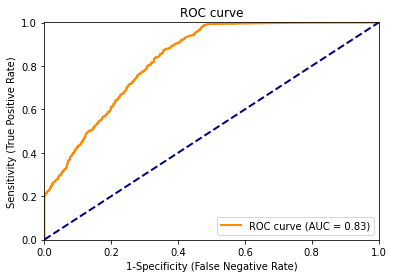

 AUC: 0.8326935378419558
   Threshold  Kernel  C Gamma  Accuracy  Sensitivity  Specificity  Precision  \
0   0.707402  linear  1    NA  0.851351     0.989687     0.516636   0.832049   
0   0.707402  linear  2    NA  0.851351     0.989687     0.516636   0.832049   
0   0.707402  linear  3    NA  0.851351     0.989687     0.516636   0.832049   

        NPV       AUC  
0  0.953925  0.844880  
0  0.953925  0.812799  
0  0.953925  0.832694  


In [22]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 3

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 5
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


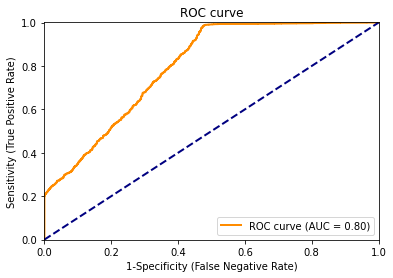

 AUC: 0.7964670156417467
   Threshold  Kernel  C Gamma  Accuracy  Sensitivity  Specificity  Precision  \
0   0.707402  linear  1    NA  0.851351     0.989687     0.516636   0.832049   
0   0.707402  linear  2    NA  0.851351     0.989687     0.516636   0.832049   
0   0.707402  linear  3    NA  0.851351     0.989687     0.516636   0.832049   
0   0.707402  linear  5    NA  0.851351     0.989687     0.516636   0.832049   

        NPV       AUC  
0  0.953925  0.844880  
0  0.953925  0.812799  
0  0.953925  0.832694  
0  0.953925  0.796467  


In [23]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 5

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



In [24]:
resultshistory

,Threshold,Kernel,C,Gamma,Accuracy,Sensitivity,Specificity,Precision,NPV,AUC
0,0.707402,linear,1,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.844880
0,0.707402,linear,2,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.812799
0,0.707402,linear,3,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.832694
0,0.707402,linear,5,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.796467


In [25]:
resultshistory.to_csv('/content/restultshistory1.csv', index=False)

0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 0.1
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


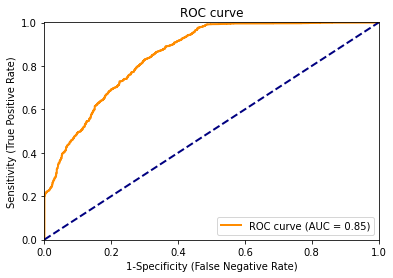

 AUC: 0.8524532985770344
   Threshold  Kernel    C Gamma  Accuracy  Sensitivity  Specificity  \
0   0.707402  linear    1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear    2    NA  0.851351     0.989687     0.516636   
0   0.707402  linear    3    NA  0.851351     0.989687     0.516636   
0   0.707402  linear    5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear  0.1    NA  0.851351     0.989687     0.516636   

   Precision       NPV       AUC  
0   0.832049  0.953925  0.844880  
0   0.832049  0.953925  0.812799  
0   0.832049  0.953925  0.832694  
0   0.832049  0.953925  0.796467  
0   0.832049  0.953925  0.852453  


In [26]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 0.1

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 560   27]
 [ 522 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 0.01
                                      gamma: NA
                                   Accuracy: 0.8516216216216216
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5175600739371534
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8323160938001928
                  NEGATIVE PREDICTIVE VALUE: 0.9540034071550255


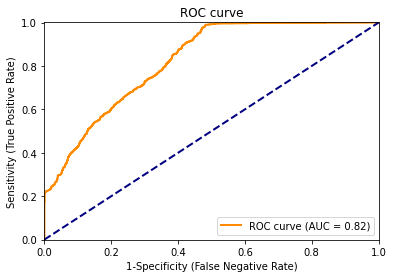

 AUC: 0.8227559382011922
   Threshold  Kernel     C Gamma  Accuracy  Sensitivity  Specificity  \
0   0.707402  linear     1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     2    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     3    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear   0.1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear  0.01    NA  0.851622     0.989687     0.517560   

   Precision       NPV       AUC  
0   0.832049  0.953925  0.844880  
0   0.832049  0.953925  0.812799  
0   0.832049  0.953925  0.832694  
0   0.832049  0.953925  0.796467  
0   0.832049  0.953925  0.852453  
0   0.832316  0.954003  0.822756  


In [27]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 0.01

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 0.5
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


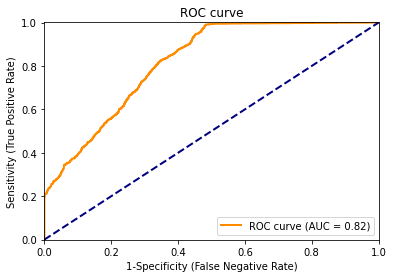

 AUC: 0.8171478135868698
   Threshold  Kernel     C Gamma  Accuracy  Sensitivity  Specificity  \
0   0.707402  linear     1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     2    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     3    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear   0.1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear  0.01    NA  0.851622     0.989687     0.517560   
0   0.707402  linear   0.5    NA  0.851351     0.989687     0.516636   

   Precision       NPV       AUC  
0   0.832049  0.953925  0.844880  
0   0.832049  0.953925  0.812799  
0   0.832049  0.953925  0.832694  
0   0.832049  0.953925  0.796467  
0   0.832049  0.953925  0.852453  
0   0.832316  0.954003  0.822756  
0   0.832049  0.953925  0.817148  


In [28]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 0.5

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 0.2
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


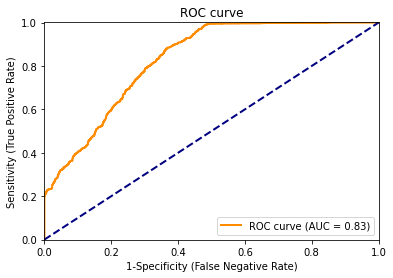

 AUC: 0.8280142169453901
   Threshold  Kernel     C Gamma  Accuracy  Sensitivity  Specificity  \
0   0.707402  linear     1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     2    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     3    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear   0.1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear  0.01    NA  0.851622     0.989687     0.517560   
0   0.707402  linear   0.5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear   0.2    NA  0.851351     0.989687     0.516636   

   Precision       NPV       AUC  
0   0.832049  0.953925  0.844880  
0   0.832049  0.953925  0.812799  
0   0.832049  0.953925  0.832694  
0   0.832049  0.953925  0.796467  
0   0.832049  0.953925  0.852453  
0   0.832316  0.954003  0.822756  
0   0.832049  0.953925  0.817148  
0   0.832049  0.953925  0.828014  


In [29]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 0.2

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 0.09
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


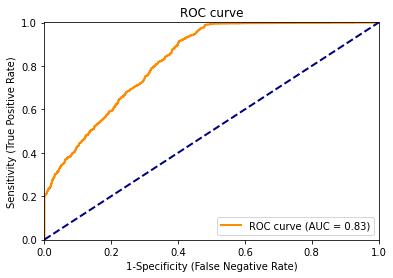

 AUC: 0.8285882324699331
   Threshold  Kernel     C Gamma  Accuracy  Sensitivity  Specificity  \
0   0.707402  linear     1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     2    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     3    NA  0.851351     0.989687     0.516636   
0   0.707402  linear     5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear   0.1    NA  0.851351     0.989687     0.516636   
0   0.707402  linear  0.01    NA  0.851622     0.989687     0.517560   
0   0.707402  linear   0.5    NA  0.851351     0.989687     0.516636   
0   0.707402  linear   0.2    NA  0.851351     0.989687     0.516636   
0   0.707402  linear  0.09    NA  0.851351     0.989687     0.516636   

   Precision       NPV       AUC  
0   0.832049  0.953925  0.844880  
0   0.832049  0.953925  0.812799  
0   0.832049  0.953925  0.832694  
0   0.832049  0.953925  0.796467  
0   0.832049  0.953925  0.852453  
0   0.832316  0.954003  0.822756  
0   0.832

In [31]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 0.09

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

print(resultshistory)



0.7074018301864937
Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 559   27]
 [ 523 2591]]
                                  Threshold: 0.7074018301864937
                                     Kernel: linear
                                          C: 0.095
                                      gamma: NA
                                   Accuracy: 0.8513513513513513
                       SENSITIVITY (RECALL): 0.9896867838044309
                     SPECIFICITY (FALL-OUT): 0.5166358595194085
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.8320488118175979
                  NEGATIVE PREDICTIVE VALUE: 0.9539249146757679


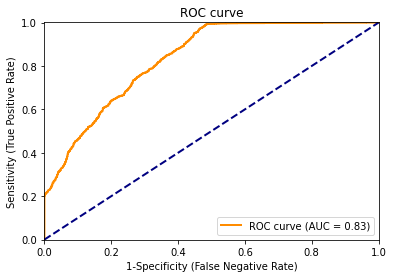

 AUC: 0.833887108868081


,Threshold,Kernel,C,Gamma,Accuracy,Sensitivity,Specificity,Precision,NPV,AUC
0,0.707402,linear,1,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.844880
0,0.707402,linear,2,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.812799
0,0.707402,linear,3,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.832694
0,0.707402,linear,5,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.796467
0,0.707402,linear,0.1,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.852453
0,0.707402,linear,0.01,NA,0.851622,0.989687,0.517560,0.832316,0.954003,0.822756
0,0.707402,linear,0.5,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.817148
0,0.707402,linear,0.2,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.828014
0,0.707402,linear,0.09,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.828588
0,0.707402,linear,0.095,NA,0.851351,0.989687,0.516636,0.832049,0.953925,0.833887


In [32]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kernel = 'linear'
c = 0.095

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True, kernel=kernel, C=c))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

class_threshold = joined_count / (joined_count + notjoined_count)
print(class_threshold)


# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo


df = pd.DataFrame([[class_threshold, 
                    kernel, 
                    c, 
                    "NA", 
                    custom_accuracy_score(y_test, y_pred), 
                    custom_sensitivity_score(y_test, y_pred),
                    custom_specificity_score(y_test, y_pred),
                    custom_ppv_score(y_test, y_pred),
                    custom_npv_score(y_test, y_pred),
                    roc_auc_score(y_test, y_pred_prob)
                    ]], columns=columns)
resultshistory = resultshistory.append(df)


print('Métricas del modelo de Máquina de Vectores de Soporte: \n')
cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))
print("                                  Threshold: " + str(class_threshold))
print("                                     Kernel: " + str(kernel))
print("                                          C: " + str(c))
print("                                      gamma: " + "NA")
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

resultshistory

